# ORL PCA

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors

import sys
import os
import importlib

sys.path.insert(1, os.path.realpath(os.path.pardir))

import orl as orl
import utils as utils
import visualise as visualise

importlib.reload(visualise);
importlib.reload(utils);
importlib.reload(orl);

import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [16]:
X_train, X_test, y_train, y_test = orl.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

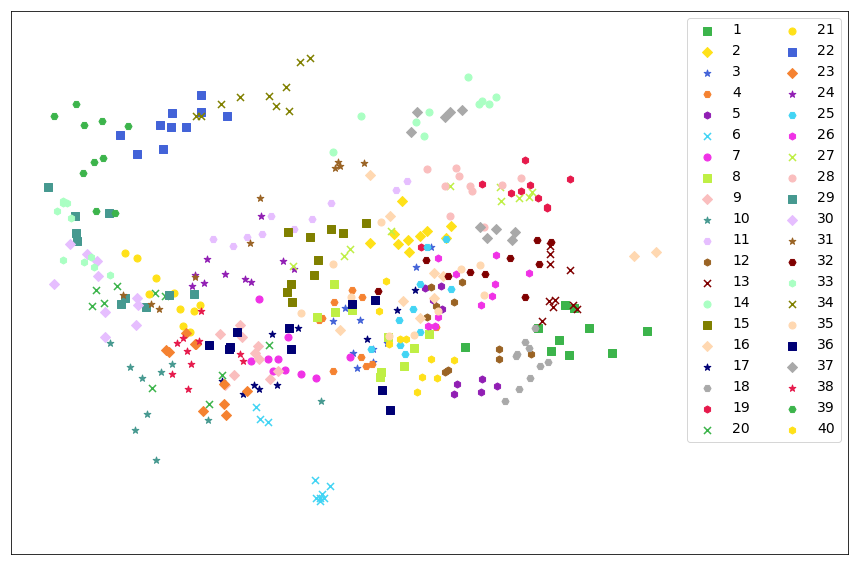

In [3]:
plt.rcParams.update({'font.size': 14})
X_2d = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(15, 10))
colors = np.tile(['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#42d4f4', '#f032e6', '#bfef45', '#fabebe', '#469990', '#e6beff',
          '#9A6324', '#800000', '#aaffc3', '#808000', '#ffd8b1',
          '#000075', '#a9a9a9'], 4)
markers = np.tile(['o', 's', 'D', '*', 'H', 'h', 'x'], 20)

for class_ in np.unique(y):
    ix = np.where(y == class_)
    ax.scatter(X_2d[ix][:,0], X_2d[ix][:,1], 
               label=class_, marker=markers[class_], color=colors[class_], s=50)
ax.legend(ncol=2)
ax.set_ylim(-6, 6)
ax.set_xlim(-5, 8)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
ax.yaxis.set_tick_params(left=False, labelleft=False)
#ax.axis('off');
fig.savefig('orl_2d_plot.pdf', bbox_inches='tight')

## Cumulative sum of first 60 eigenvalues

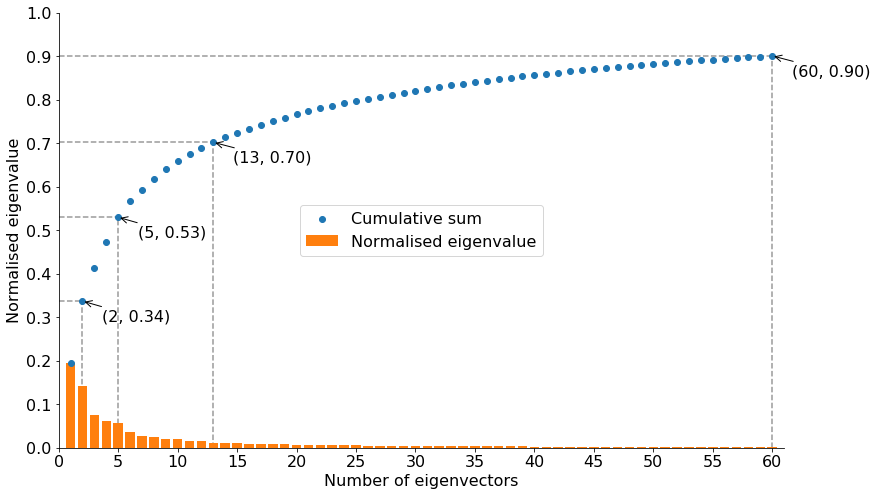

In [18]:
#visualise.pca_variance(X, max_d=60, figure_file_name='orl_cumsum_60_eigvals.pdf')
visualise.pca_variance(X, max_d=60)

# Decision Boundary

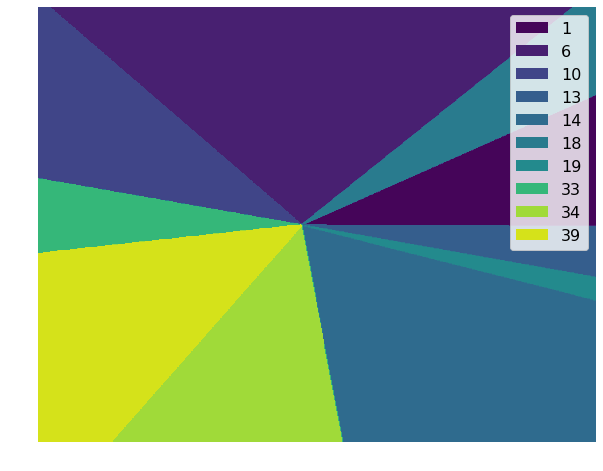

In [17]:
classifier = utils.load_classifier_with_best_params('pmse', 'orl', True)
X_train_2d = PCA(n_components=2).fit_transform(X_train)
visualise.decision_boundary(classifier, X_train_2d, y_train, figure_file_name='orl_2d_pmse_decision_boundary.pdf')

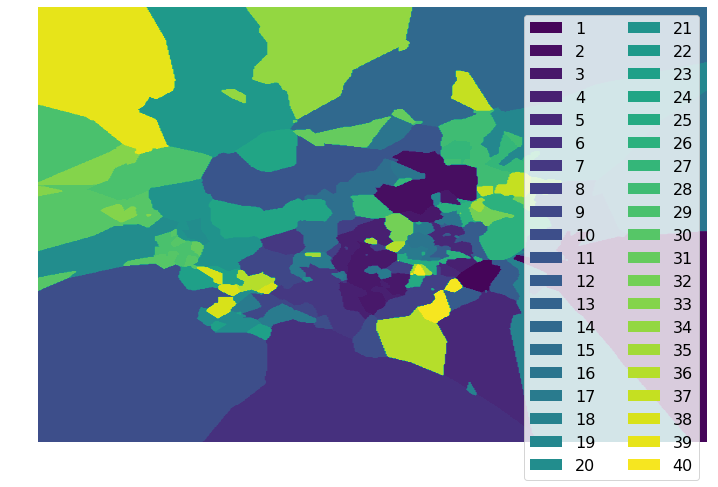

In [9]:
classifier = utils.load_classifier_with_best_params('nn', 'orl', True)

X_train_2d = PCA(n_components=2).fit_transform(X)
visualise.decision_boundary(classifier, X_train_2d, y, figsize=(12, 8))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished


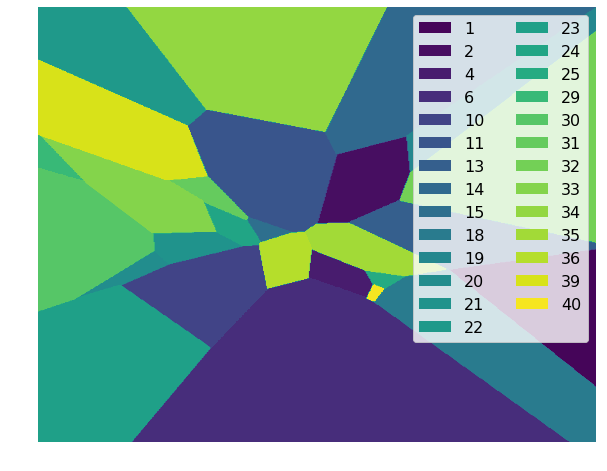

In [10]:
classifier = utils.load_classifier_with_best_params('pback', 'orl', True)
X_train_2d = PCA(n_components=2).fit_transform(X)
visualise.decision_boundary(classifier, X_train_2d, y)